<a href="https://colab.research.google.com/github/PCDAONE/fantasy-football/blob/main/PredictorV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('seaborn')
import requests
import re
import time
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
import random as rnd

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# reading 2021 data for each position
df2021qb = pd.read_csv("/content/FantasyProject - 2021 QBs.csv")
df2021rb = pd.read_csv("/content/FantasyProject - 2021 RBs.csv")
df2021te = pd.read_csv("/content/FantasyProject - 2021 TEs.csv")
df2021wr = pd.read_csv("/content/FantasyProject - 2021 WRs.csv")

# reading 2019 + 2020 data for each position
df201920qb = pd.read_csv("/content/FantasyProject - 2019+2020 QBs.csv")
df201920rb = pd.read_csv("/content/FantasyProject - 2019+2020 RBs.csv")
df201920te = pd.read_csv("/content/FantasyProject - 2019+2020 TEs.csv")
df201920wr = pd.read_csv("/content/FantasyProject - 2019+2020 WRs.csv")

In [ ]:
# removing null values for all data
df2021qb = df2021qb.dropna()
df2021rb = df2021rb.dropna()
df2021te = df2021te.dropna()
df2021wr = df2021wr.dropna()

df201920qb = df201920qb.dropna()
df201920rb = df201920rb.dropna()
df201920te = df201920te.dropna()
df201920wr = df201920wr.dropna()

In [ ]:
# dropping the player name column
df2021qb = df2021qb.drop(columns=['Player'])
df2021rb = df2021rb.drop(columns=['Player'])
df2021te = df2021te.drop(columns=['Player'])
df2021wr = df2021wr.drop(columns=['Player'])

df201920qb = df201920qb.drop(columns=['Player'])
df201920rb = df201920rb.drop(columns=['Player'])
df201920te = df201920te.drop(columns=['Player'])
df201920wr = df201920wr.drop(columns=['Player'])

In [ ]:
Xqb = df201920qb.iloc[:,0:18]
Yqb = df201920qb.iloc[:,18]

In [ ]:
Xrb = df201920rb.iloc[:,0:18]
Yrb = df201920rb.iloc[:,18]

In [ ]:
Xte = df201920te.iloc[:,0:14]
Yte = df201920te.iloc[:,14]

In [ ]:
Xwr = df201920wr.iloc[:,0:18]
Ywr = df201920wr.iloc[:,18]

In [ ]:
# training 4 models
Xqb_train, Xqb_test, yqb_train, yqb_test = train_test_split(Xqb, Yqb, test_size=0.25)
Xrb_train, Xrb_test, yrb_train, yrb_test = train_test_split(Xrb, Yrb, test_size=0.25)
Xte_train, Xte_test, yte_train, yte_test = train_test_split(Xte, Yte, test_size=0.25)
Xwr_train, Xwr_test, ywr_train, ywr_test = train_test_split(Xwr, Ywr, test_size=0.25)

In [ ]:
# tuning for QB model
import xgboost as xgb

dmatrix = xgb.DMatrix(data=Xqb, label=Yqb)
params = { 'max_depth': [3, 5, 6, 10, 15, 20, 25, 30, 35, 40],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'n_estimators': [10, 20, 30, 50, 100, 500, 1000, 1500, 2000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=0)
clf.fit(Xqb, Yqb)


print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Exception ignored in: <function Booster.__del__ at 0x7f8d5cb0b4d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 958, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
KeyboardInterrupt


[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
modelqb = XGBRegressor(subsample=0.7, reg_lambda=1.6, n_estimators=500, reg_alpha=0.1, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=2, colsample_bytree=0.6, colsample_bylevel=0.5)

In [ ]:
# tuning RB model
import xgboost as xgb

dmatrix = xgb.DMatrix(data=Xrb, label=Yrb)
params = { 'max_depth': [3, 5, 6, 10, 15, 20, 25, 30, 35, 40],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'n_estimators': [10, 20, 30, 50, 100, 500, 1000, 1500, 2000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=0)
clf.fit(Xrb, Yrb)


print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
modelrb = XGBRegressor(subsample=0.7, reg_lambda=51.2, n_estimators=50, reg_alpha=25.6, min_child_weight=10, max_depth=20, learning_rate=0.5, gamma=1.5, colsample_bytree=0.7, colsample_bylevel=0.79999999999999999)

In [ ]:
# tuning TE model
import xgboost as xgb

dmatrix = xgb.DMatrix(data=Xte, label=Yte)
params = { 'max_depth': [3, 5, 6, 10, 15, 20, 25, 30, 35, 40],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'n_estimators': [10, 20, 30, 50, 100, 500, 1000, 1500, 2000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=0)
clf.fit(Xte, Yte)


print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[21:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
modelte = XGBRegressor(subsample=0.6, reg_lambda=0.2, n_estimators=500, reg_alpha=0.2, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=5, colsample_bytree=0.89999999999999999, colsample_bylevel=0.6)

In [ ]:
# tuning WR model
import xgboost as xgb

dmatrix = xgb.DMatrix(data=Xwr, label=Ywr)
params = { 'max_depth': [3, 5, 6, 10, 15, 20, 25, 30, 35, 40],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'n_estimators': [10, 20, 30, 50, 100, 500, 1000, 1500, 2000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=0)
clf.fit(Xwr, Ywr)


print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
modelwr = XGBRegressor(subsample=0.8999999999999999, reg_lambda=3.2, n_estimators=500, reg_alpha=0, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=1.5, colsample_bytree=0.4, colsample_bylevel=0.4)

In [ ]:
# fitting the model
modelqb.fit(Xqb_train, yqb_train)
yqb_pred = modelqb.predict(Xqb_test)

modelrb.fit(Xrb_train, yrb_train)
yrb_pred = modelrb.predict(Xrb_test)

modelte.fit(Xte_train, yte_train)
yte_pred = modelte.predict(Xte_test)

modelwr.fit(Xwr_train, ywr_train)
ywr_pred = modelwr.predict(Xwr_test)

[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# predicting fantasy points for players based on their 2021 stats
predictionqb = pd.DataFrame(modelqb.predict(df2021qb))
predictionrb = pd.DataFrame(modelrb.predict(df2021rb))
predictionte = pd.DataFrame(modelte.predict(df2021te))
predictionwr = pd.DataFrame(modelwr.predict(df2021wr))

In [ ]:
predictionqb

,0
0,306.822601
1,335.916321
2,274.796722
3,275.173523
4,332.802917
5,276.736511
6,257.934998
7,285.096283
8,232.741272
9,314.261200


In [ ]:
predictionrb

,0
0,251.846985
1,179.074799
2,176.561462
3,185.028976
4,159.526535
...,...
78,100.884583
79,115.543228
80,146.022430
81,133.488998


In [ ]:
predictionte

,0
0,237.634766
1,204.231491
2,79.093895
3,224.310333
4,105.571907
5,191.516556
6,212.721359
7,137.112885
8,172.417542
9,133.605743


In [ ]:
predictionwr

,0
0,220.123276
1,190.206268
2,227.593994
3,194.444717
4,227.573502
...,...
118,106.632294
119,108.231789
120,112.808937
121,112.820213


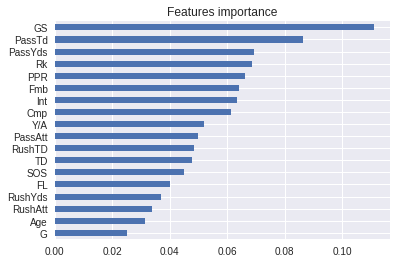

In [ ]:
pd.Series(modelqb.feature_importances_, index=Xqb.columns).sort_values().tail(23)\
    .plot.barh(title='Features importance');

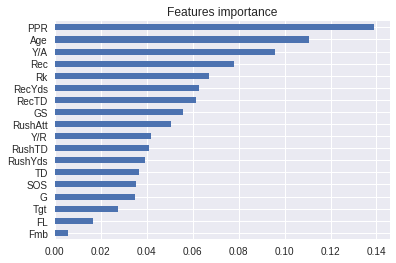

In [ ]:
pd.Series(modelrb.feature_importances_, index=Xrb.columns).sort_values().tail(23)\
    .plot.barh(title='Features importance');

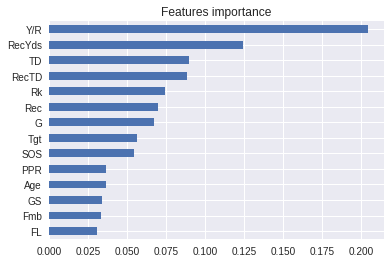

In [ ]:
pd.Series(modelte.feature_importances_, index=Xte.columns).sort_values().tail(23)\
    .plot.barh(title='Features importance');

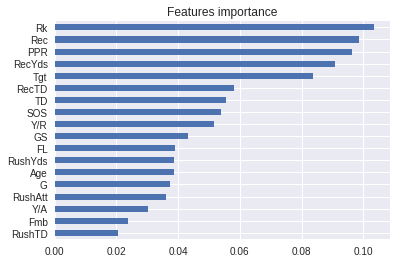

In [ ]:
pd.Series(modelwr.feature_importances_, index=Xwr.columns).sort_values().tail(23)\
    .plot.barh(title='Features importance');